# Vegan Food Sentiment Analysis

In [1]:
#!pip install tweepy --user

In [2]:
#!pip install nltk --user

In [3]:
import tweepy # Twitter API
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [5]:
%run ./keys.ipynb # run the file for getting API Keys

In [6]:
auth = tweepy.OAuthHandler(API_key,API_key_secret) 
auth.set_access_token(Access_token,Access_token_secret)
api = tweepy.API(auth)

In [7]:
CN_lat = 60.36414   # Fort Smith, NT (NorthWest Territories)
CN_long= -123.2145
CN_max_range = 5000
CN = "Canada"

US_lat = 39.8283    # Kansas, USA
US_long= -98.5795
US_max_range = 500
US = "US"


IN_lat = 21.7679    # Bhairopani, Madhya Pradesh, India
IN_long= 78.8718
IN_max_range = 500
IN = "India"


#UK_lat = 53.14346   # Morton, UK
#UK_long = -1.38804
#UK_max_range = 500
#UK = "UK"

data = []

In [8]:
# get the tweets accrding to country and Vegan food

def get_tweet(lat, long, max_range, loc):
    
    tweet = tweepy.Cursor(api.search_tweets,
                   q=["vegan" or "Vegan" or "VEGAN" and "food", "diet"],
                   geocode = "%f,%f,%dkm" % (lat, long, max_range),
                   lang="en").items(5000)
    for i in tweet:
        data.append([i.created_at, i.id, i.user.screen_name,i.text, i.favorite_count, i.retweet_count, i.lang,
                     i.user.location, loc]) 

In [9]:
get_tweet(CN_lat, CN_long, CN_max_range, CN)
get_tweet(US_lat, US_long, US_max_range, US)
get_tweet(IN_lat, IN_long, IN_max_range, IN)
#get_tweet(UK_lat, UK_long, UK_max_range, UK)

In [10]:
col = ["Date_and_Time", "Tweet_Id", "User", "Tweet", "Like_Count", "Retweet_Count", "Lang", "Location","Country"]
df = pd.DataFrame(data, columns=col)

In [11]:
df

Date_and_Time             Tweet_Id             User  \
0   2022-08-11 15:24:25+00:00  1557749787654488065    NurseCanadian   
1   2022-08-11 15:20:59+00:00  1557748922881380352    NurseCanadian   
2   2022-08-11 12:37:25+00:00  1557707759641972736       Finished44   
3   2022-08-11 03:42:06+00:00  1557573044998135809       onwardMaya   
4   2022-08-09 21:09:06+00:00  1557111755658125316        EmDubya36   
5   2022-08-08 19:17:03+00:00  1556721168761212929    NurseCanadian   
6   2022-08-08 18:02:42+00:00  1556702457027256325    NurseCanadian   
7   2022-08-08 17:53:46+00:00  1556700209576542210    NurseCanadian   
8   2022-08-08 16:55:14+00:00  1556685478484754433    NurseCanadian   
9   2022-08-08 14:13:11+00:00  1556644699062026240    NurseCanadian   
10  2022-08-08 13:55:14+00:00  1556640180899139585        marleyinx   
11  2022-08-08 07:33:06+00:00  1556544013355851781     109daisuki69   
12  2022-08-07 19:49:00+00:00  1556366819274792961    GastroHistory   
13  2022-08-06 22:07:59+00:00  1556039406603083776   VoteoutTrudeau   
14  2022-08-06 16:43:07+00:00  1555957652311662592         ShopGday   
15  2022-08-06 12:16:22+00:00  1555890524195880963  healthstepsonly   
16  2022-08-06 01:35:14+00:00  1555729178560962560   UnknownDeath63   
17  2022-08-06 01:01:41+00:00  1555720735456468998       TheOtherCB   
18  2022-08-04 23:15:20+00:00  1555331581929209856   wholenessnutri   
19  2022-08-04 15:11:03+00:00  1555209707945689093      DrawdownRDs   
20  2022-08-12 12:30:41+00:00  1558068451872313344          niels_k   
21  2022-08-12 09:47:12+00:00  1558027311173230592  ChicagoPlantEat   
22  2022-08-12 07:47:13+00:00  1557997117255344128  ChicagoPlantEat   
23  2022-08-12 07:28:55+00:00  1557992513125892096    AuthorSASplus   
24  2022-08-12 01:48:44+00:00  1557906900561416193       brilarsonn   
25  2022-08-11 16:15:49+00:00  1557762720551866370   PrettyGreenFit   
26  2022-08-11 07:48:26+00:00  1557635035867627520     nuckfathalie   
27  2022-08-11 02:35:12+00:00  1557556209296687104      LoveQuercus   
28  2022-08-11 02:00:10+00:00  1557547391724781573      RobotPeston   
29  2022-08-11 01:47:09+00:00  1557544114895331329  ChicagoPlantEat   
30  2022-08-11 01:30:10+00:00  1557539840996114432      RobotPeston   
31  2022-08-11 01:27:55+00:00  1557539274899148803      LoveQuercus   
32  2022-08-10 20:48:41+00:00  1557469002485596160     samadams1775   
33  2022-08-10 20:41:17+00:00  1557467141846118401    VeganIsLove22   
34  2022-08-10 16:07:34+00:00  1557398259173396482       frogsndash   
35  2022-08-10 15:47:09+00:00  1557393121205428224  ChicagoPlantEat   
36  2022-08-10 14:12:34+00:00  1557369318945574913    simpleduckman   
37  2022-08-10 12:39:26+00:00  1557345880235249664    Liberty_Vegan   
38  2022-08-10 12:29:24+00:00  1557343355159322624    Liberty_Vegan   
39  2022-08-10 11:41:25+00:00  1557331278659293185  SIMPLY8_gummies   
40  2022-08-10 10:47:11+00:00  1557317632013074433  ChicagoPlantEat   
41  2022-08-10 05:47:09+00:00  1557242127075233792  ChicagoPlantEat   
42  2022-08-10 01:07:05+00:00  1557171645890314240    MyVegan_Reach   
43  2022-08-09 21:41:46+00:00  1557119976158269440    Jim_P_OReilly   
44  2022-08-09 18:27:49+00:00  1557071163750326277        keldog125   
45  2022-08-09 16:59:19+00:00  1557048891811528704  OrganicLiveFood   
46  2022-08-09 16:47:10+00:00  1557045837741670402  ChicagoPlantEat   
47  2022-08-09 16:42:31+00:00  1557044667904049153        bfhhealth   
48  2022-08-09 15:15:10+00:00  1557022683413487618      RobotPeston   
49  2022-08-09 14:47:10+00:00  1557015637519630340  ChicagoPlantEat   
50  2022-08-09 13:09:02+00:00  1556990941159981057  dietfitnesstips   
51  2022-08-09 04:13:52+00:00  1556856263543140353       eCitizenLH   
52  2022-08-09 01:19:22+00:00  1556812345787252737         John_LFK   
53  2022-08-09 01:00:10+00:00  1556807515488362496      RobotPeston   
54  2022-08-08 21:32:41+00:00  1556755302720352256    MyVegan_Reach   
55  2022-08-08 20:45:10+00:00  155674334

In [12]:
df["User"] = df.User.astype("string")
df["Tweet"] = df.Tweet.astype("string")
df["Lang"] = df.Lang.astype("string")
df["Location"] = df.Location.astype("string")
df["Country"] = df.Country.astype('category') 

In [13]:
df.dtypes

Date_and_Time    datetime64[ns, UTC]
Tweet_Id                       int64
User                          string
Tweet                         string
Like_Count                     int64
Retweet_Count                  int64
Lang                          string
Location                      string
Country                     category
dtype: object

In [14]:
df.Tweet.duplicated().sum()

7

In [15]:
df.drop_duplicates('Tweet', keep='last', inplace=True) # remove duplicate tweets 

In [16]:
df.Tweet.duplicated().sum()

0

In [17]:
dt = datetime.now().strftime("%Y_%m_%d-%H-%M-%S_%p")

In [18]:
dt

'2022_08_12-11-32-18_AM'

In [19]:
df.to_csv(f"C:\\Users\\Neha\\Downloads\\\Vegan\\Data\\vegan_data_{dt}.csv") # to write the data into csv file with date and timestamp

# Data Preprocessing

Data preprocessing steps:

1. Cleaning the text
2. Tokenization
3. Enrichment – POS tagging
4. Stopwords removal
5. Obtaining the Lemma words

## To clean the twitter's tweets

In [20]:
# NLTK Sentiment Analysis Package : https://www.nltk.org/api/nltk.sentiment.html
#The NLTK library contains various utilities that allow you to effectively manipulate and analyze linguistic data.

import nltk # nltk(Natural Language Toolkit) Library to work with human language data

In [21]:
# to download specific resources directly from particular library
# NLTK to find and download each resource based on its identifier


# nltk.download('stopwords') 
# nltk.download('wordnet')

In [22]:
from nltk.corpus import stopwords 
# Wordnet is a lexical database for the English language that helps the script determine the base word. 
import re as re 
# Regular expression Library : Both patterns and strings to be 
#searched can be Unicode strings (str) as well as 8-bit strings (bytes). :: https://docs.python.org/3/library/re.html#module-re
#1. Hyperlinks - All hyperlinks in Twitter are converted to the URL shortener t.co. 
    # Therefore, keeping them in the text processing would not add any value to the analysis.
#2. Twitter handles in replies - These Twitter usernames are preceded by a @ symbol, 
    # which does not convey any meaning.
#3. Punctuation and special characters - While these often provide context to textual data, 
    # this context is often difficult to process. 
    # For simplicity, you will remove all punctuation and special characters from tweets.


# Define a function to clean the text

In [23]:
# Handling the data clean part using below user defined function 
def clean(text):
    text = re.sub("@[A-Za-z0-9_]+","", text) # Removing mentions
    text = re.sub("#[A-Za-z0-9_]+","", text) # Removing hashtags
    text = re.sub(r"http\S+", "", text) # Removing links
    text = re.sub(r"www.\S+", "", text) # Removing links
    text = re.sub('[()!?]', '', text) # Removing punctuations/Special Characters
    text = re.sub('\[.*?\]','', text) # Removing punctuations/Special Characters
    text = re.sub("[^A-Za-z0-9 \t]","", text) # Filtering non-alphanumeric characters if incase something still persists
    text = re.sub("\d+","", text) # Removing digits e.g. 1000x, 100p
    return text

In [24]:
# Cleaning the text in the review column

df['Cleaned_Tweets'] = df['Tweet'].apply(clean) 

In [25]:
df['Cleaned_Tweets'] = df['Cleaned_Tweets'].apply(lambda x: ','.join([w for w in x.split() if len(w)>3]))

In [26]:
#df["Cleaned_Tweets"]

In [27]:
# Finding the white space row from dataframe and replacing it with NaN values

df["Cleaned_Tweets"] = df["Cleaned_Tweets"].apply(lambda x: np.nan if (re.search("^\s*$", x)) else x)

In [28]:
# convert into lower case
df["Cleaned_Tweets"] = df["Cleaned_Tweets"].str.lower()

In [29]:
df.isnull().sum()

Date_and_Time     0
Tweet_Id          0
User              0
Tweet             0
Like_Count        0
Retweet_Count     0
Lang              0
Location          0
Country           0
Cleaned_Tweets    0
dtype: int64

In [30]:
df[["Cleaned_Tweets", "Tweet"]]

Cleaned_Tweets  \
0    lmfao,really,antivegan,youtube,channel,thats,w...   
1    have,masters,nutrition,nurse,practitioner,married   
2     this,child,literally,puppet,control,freak,mother   
3    late,night,vegan,donuts,because,totally,going,...   
4    also,incorrect,statement,because,those,animal,...   
5                understand,that,dont,really,mean,that   
6    simply,eating,vegan,diet,theyre,already,loweri...   
7    explain,what,vegan,fake,food,mean,processed,fo...   
8    dont,need,raise,animals,kill,your,pleasure,sim...   
9     they,know,thati,dont,fake,vegan,meat,just,plants   
10   have,ever,googled,there,plenty,studies,saying,...   
11   since,there,where,write,this,comment,cardmy,st...   
12   nowhere,diet,taken,more,than,africanamerican,c...   
13   vegan,lifestyle,isnt,everyone,heard,that,meat,...   
14   keto,potato,vegetarian,vegan,find,your,diet,wi...   
15                                   should,vegan,diet   
16   technically,hedgehogs,cant,vegan,they,need,die...   
17   completely,missed,years,this,girl,decided,done...   
18              what,like,living,plantbased,diet,month   
19   looking,yummy,climatefriendly,summer,recipe,th...   
20   wanted,plantbased,whopper,curiosity,veganwell,...   
22   real,health,movement,growing,whether,your,heal...   
23   some,scientists,reckon,farting,cows,killing,pl...   
24   alex,jones,self,described,alpha,male,eating,ve...   
25   nowadays,when,people,think,plantbased,they,thi...   
26   grand,rising,periods,unnatural,caused,your,die...   
27   eats,whole,food,mostly,fruits,vegetables,legum...   
28   owner,daily,mail,viscount,rothermere,firmly,be...   
29   vibrant,colors,represent,wide,array,vitamins,m...   
30   angry,women,from,dairy,council,used,ritual,sac...   
31   true,steak,take,fill,later,nutritional,science...   
32   frickin,awesomeanother,reason,stop,production,...   
33   youre,concerned,about,plants,should,realize,th...   
34   according,plantbased,physician,mills,what,affe...   
36   impossible,both,believe,animal,rights,meat,don...   
37     have,study,show,that,genuinely,interested,drink   
38   nothing,wrong,with,diet,sweeteners,from,studie...   
39   what,kids,definitely,need,multivitaminswho,are...   
41   great,interview,williams,caldwell,esselstyn,bo...   
42   antiaging,effects,vegan,diet,health,benefits,e...   
43   knows,sure,evidence,seems,strong,whole,plant,v...   
44                                   strict,vegan,diet   
45                                     anti,foods,beat   
47   pretty,interesting,thread,supplement,vegetaria...   
48   youknowwho,tipped,that,postbrexit,government,w...   
49   real,health,movement,growing,whether,your,heal...   
50   here,home,nutrisystem,vegetarian,diet,food,nut...   
51   even,slightly,surprised,joint,pain,over,body,d...   
52   found,tweets,quite,comprehensible,they,werent,...   
53   woman,dressed,white,sheet,claiming,ghost,truss...   
54   antiaging,effects,vegan,diet,health,benefits,e...   
55   youknowwho,gave,bumhole,tickle,with,their,litt...   
56   indoctrinator,miming,words,childanyone,would,t...   
57                               have,choice,what,made   
58          american,foods,that,banned,other,countries   
59                    there,that,will,what,eating,does   
60   know,vegan,more,than,just,diet,weight,loss,mai...   
61   vegan,soul,food,expert,lomasi,lists,healthy,re...   
62   they,will,something,voices,louder,protests,lar...   
63   please,consider,moving,mostly,lowno,oilsaltfat...   
64   vibrant,colors,represent,wide,array,vitamins,m...   
65                                     good,vegan,diet   
66   that,true,they,usually,vegan,until,another,die...   
67   average,lifespan,british,years,this,possible,w...   
68      fact,that,easy,doesnt,mean,would,easy,everyone   
70   antiaging,effects,vegan,diet,health,benefits,e...   
72             does,food,that,affect,overall,wellbeing   
73   consists,amusing,while,nature,cures,diseases,brin   
74   owner,daily,mail,viscount,rotherm

In [31]:
df.dropna(inplace = True) # Dropping the na values

In [32]:
df.reset_index() # Reindexing the dataframe

index             Date_and_Time             Tweet_Id             User  \
0        0 2022-08-11 15:24:25+00:00  1557749787654488065    NurseCanadian   
1        1 2022-08-11 15:20:59+00:00  1557748922881380352    NurseCanadian   
2        2 2022-08-11 12:37:25+00:00  1557707759641972736       Finished44   
3        3 2022-08-11 03:42:06+00:00  1557573044998135809       onwardMaya   
4        4 2022-08-09 21:09:06+00:00  1557111755658125316        EmDubya36   
5        5 2022-08-08 19:17:03+00:00  1556721168761212929    NurseCanadian   
6        6 2022-08-08 18:02:42+00:00  1556702457027256325    NurseCanadian   
7        7 2022-08-08 17:53:46+00:00  1556700209576542210    NurseCanadian   
8        8 2022-08-08 16:55:14+00:00  1556685478484754433    NurseCanadian   
9        9 2022-08-08 14:13:11+00:00  1556644699062026240    NurseCanadian   
10      10 2022-08-08 13:55:14+00:00  1556640180899139585        marleyinx   
11      11 2022-08-08 07:33:06+00:00  1556544013355851781     109daisuki69   
12      12 2022-08-07 19:49:00+00:00  1556366819274792961    GastroHistory   
13      13 2022-08-06 22:07:59+00:00  1556039406603083776   VoteoutTrudeau   
14      14 2022-08-06 16:43:07+00:00  1555957652311662592         ShopGday   
15      15 2022-08-06 12:16:22+00:00  1555890524195880963  healthstepsonly   
16      16 2022-08-06 01:35:14+00:00  1555729178560962560   UnknownDeath63   
17      17 2022-08-06 01:01:41+00:00  1555720735456468998       TheOtherCB   
18      18 2022-08-04 23:15:20+00:00  1555331581929209856   wholenessnutri   
19      19 2022-08-04 15:11:03+00:00  1555209707945689093      DrawdownRDs   
20      20 2022-08-12 12:30:41+00:00  1558068451872313344          niels_k   
21      22 2022-08-12 07:47:13+00:00  1557997117255344128  ChicagoPlantEat   
22      23 2022-08-12 07:28:55+00:00  1557992513125892096    AuthorSASplus   
23      24 2022-08-12 01:48:44+00:00  1557906900561416193       brilarsonn   
24      25 2022-08-11 16:15:49+00:00  1557762720551866370   PrettyGreenFit   
25      26 2022-08-11 07:48:26+00:00  1557635035867627520     nuckfathalie   
26      27 2022-08-11 02:35:12+00:00  1557556209296687104      LoveQuercus   
27      28 2022-08-11 02:00:10+00:00  1557547391724781573      RobotPeston   
28      29 2022-08-11 01:47:09+00:00  1557544114895331329  ChicagoPlantEat   
29      30 2022-08-11 01:30:10+00:00  1557539840996114432      RobotPeston   
30      31 2022-08-11 01:27:55+00:00  1557539274899148803      LoveQuercus   
31      32 2022-08-10 20:48:41+00:00  1557469002485596160     samadams1775   
32      33 2022-08-10 20:41:17+00:00  1557467141846118401    VeganIsLove22   
33      34 2022-08-10 16:07:34+00:00  1557398259173396482       frogsndash   
34      36 2022-08-10 14:12:34+00:00  1557369318945574913    simpleduckman   
35      37 2022-08-10 12:39:26+00:00  1557345880235249664    Liberty_Vegan   
36      38 2022-08-10 12:29:24+00:00  1557343355159322624    Liberty_Vegan   
37      39 2022-08-10 11:41:25+00:00  1557331278659293185  SIMPLY8_gummies   
38      41 2022-08-10 05:47:09+00:00  1557242127075233792  ChicagoPlantEat   
39      42 2022-08-10 01:07:05+00:00  1557171645890314240    MyVegan_Reach   
40      43 2022-08-09 21:41:46+00:00  1557119976158269440    Jim_P_OReilly   
41      44 2022-08-09 18:27:49+00:00  1557071163750326277        keldog125   
42      45 2022-08-09 16:59:19+00:00  1557048891811528704  OrganicLiveFood   
43      47 2022-08-09 16:42:31+00:00  1557044667904049153        bfhhealth   
44      48 2022-08-09 15:15:10+00:00  1557022683413487618      RobotPeston   
45      49 2022-08-09 14:47:10+00:00  1557015637519630340  ChicagoPlantEat   
46      50 2022-08-09 13:09:02+00:00  1556990941159981057  dietfitnesstips   
47      51 2022-08-09 04:13:52+00:00  1556856263543140353       eCitizenLH   
48      52 2022-08-09 01:19:22+00:00  1556812345787252737         John_LFK   
49      53 2022-08-09 01:00:10+00:00  1556807515488362496      RobotPeston   
50      54 2022-08-08 21:32

In [33]:
df = df.reset_index(drop=True) # Dropping the reindexing column

In [34]:
df.isnull().sum()

Date_and_Time     0
Tweet_Id          0
User              0
Tweet             0
Like_Count        0
Retweet_Count     0
Lang              0
Location          0
Country           0
Cleaned_Tweets    0
dtype: int64

In [35]:
df[["Tweet", "Cleaned_Tweets"]]

Tweet  \
0    @AsarCadyn @thiscaitcan @KenDBerryMD lmfao, re...   
1    @AsarCadyn @thiscaitcan @KenDBerryMD I have a ...   
2    @CyclicalSnek @chewdoor @KeinDing123 @DiogodaC...   
3    Late night vegan donuts, because I'm totally g...   
4    @MikhailaFuller @CosmicSkeptic Its also an inc...   
5    @UmbraCyborg @NkedPhotography @kendokaG @dalph...   
6    @PolIpur @Burtsbs @foodbeforepills Simply by e...   
7    @ScottMcAlba @foodbeforepills Can you explain ...   
8    @ScottMcAlba @foodbeforepills You don't need t...   
9    @Burtsbs @PolIpur @foodbeforepills Are they? H...   
10   @2pacfollowsthis @JackieRoss_x3 @Maladroithe H...   
11   Ok @DisneyCruise since there was no where to w...   
12   'But nowhere has the #vegan diet taken off mor...   
13   @CaryKelly11 I'm vegan but my lifestyle isn't ...   
14   @sanapr84 Keto, Potato, Vegetarian, Vegan, Fin...   
15   Should You Eat a Vegan Diet? #Food #Vegan #die...   
16   @MyMenchies Technically hedgehogs can’t be veg...   
17   I completely missed my #veganniversary! 

14 y...   
18   What it's like Living on a Plant-Based Diet fo...   
19   Looking for a yummy, climate-friendly summer r...   
20   I wanted to try the plant-based whopper out of...   
21   The REAL Health Movement is growing!  Whether ...   
22   Some #Green #NetZero scientists reckon farting...   
23   Not Alex Jones, self described alpha male, eat...   
24   @BigBadKale @jeffreyboadi_ Nowadays when peopl...   
25   @lickitoff @WrittenByHanna grand rising period...   
26   @micsolana If one eats a whole food mostly fru...   
27   The owner of the Daily Mail, Viscount Rotherme...   
28   Vibrant colors represent the wide array of vit...   
29   Two angry women from the Dairy Council used a ...   
30   @Molson_Hart Not true. Hot steak take. I can f...   
31   @dusty_dweller Frickin awesome!!
Another reaso...   
32   @GDelonzo @GoodNewsCorres1 If you’re concerned...   
33   According to plant-based physician Dr. Mills w...   
34   It is impossible to both believe in animal rig...   
35   @MasalaFry69 @TommyTwtty Do you have a study t...   
36   @TommyTwtty Nothing wrong with diet sweeteners...   
37   What kids definitely need multivitamins:
🔹who ...   
38   Great interview of Drs Kim Williams &amp; Cald...   
39   The Anti-Aging Effects Of The Vegan Diet - Hea...   
40   @PleurerP @ZubyMusic Who knows for sure but th...   
41   A strict vegan diet 😄
@AlpacaAurelius https://...   
42   Anti #aging foods, eat to beat #diseases: http...   
43   Pretty interesting thread how to supplement on...   
44   You-Know-Who tipped me off that post-Brexit th...   
45   The REAL Health Movement is growing!  Whether ...   
46   “You are here: Home / / Nutrisystem Vegetarian...   
47   @veganfuture I am not even slightly surprised....   
48   @WilliamStults @AlexandriaV2005 Oh, you found ...   
49   A woman dressed in a white sheet and claiming ...   
50   The Anti-Aging Effects Of The Vegan Diet - Hea...   
51   You-Know-Who gave my bumhole a tickle with the...   
52   Indoctrinator miming the words of the child.

...   
53   You have a choice in what you are made of: htt...   
54   10 American Foods That Are Banned in Other Cou...   
55   There is no #diet that will do what #healthy e...   
56   I know vegan is more than just a diet but for ...   
57   Vegan soul food expert Lyn Lomasi lists 15 hea...   
58   @Clb2U @Daryl_Elliott Ah, but they will do som...   
59   #veganism #Health #Nutrition #Strokes #HeartDi...   
60   Vibrant colors represent the wide array of vit...   
61                    @gnomeszs good for a vegan diet!   
62   @PiperGreenFairy @VeganSupremeTM that is true....   
63   @kill_joy___ @AltcoinPsycho The average lifesp...   
64   @WilliamStults @AlexandriaV2005 The fact that ...   
65   The Anti-Aging Effects Of The Vegan Diet - Hea...   
66   How does the food that we eat affect our overa...   
67   The art of #medicine consists in amusing the #...   
68   The owner of the Daily Mail, Viscount Roth

## Tokenization

Splitting strings into smaller parts called tokens.

A token is a sequence of characters in text that serves as a unit. Based on how you create the tokens, they may consist of words, emoticons, hashtags, links, or even individual characters.

A basic way of breaking language into tokens is by splitting the text based on whitespace and punctuation.

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
df["Cleaned_Tweets"]

clean_tweets = df["Cleaned_Tweets"]

tokens = word_tokenize(clean_tweets[0])

tokens

tweet_count = df["Cleaned_Tweets"].count()

tweet_count

139

## POS tagging

POS (Part of Speech) : Used to tagging parts of speech to each word of a given text such as nouns, verb, pronouns, adverbs based on definitation and its context.

In [38]:
from nltk.tag import pos_tag

pos = nltk.pos_tag(tokens)

pos

[('lmfao', 'NN'),
 (',', ','),
 ('really', 'RB'),
 (',', ','),
 ('antivegan', 'NNS'),
 (',', ','),
 ('youtube', 'NN'),
 (',', ','),
 ('channel', 'NN'),
 (',', ','),
 ('thats', 'NNS'),
 (',', ','),
 ('what', 'WP'),
 (',', ','),
 ('accept', 'NN'),
 (',', ','),
 ('eviden', 'JJ')]

## Stopwords removal


    NNP: Noun, proper, singular
    NN: Noun, common, singular or mass
    IN: Preposition or conjunction, subordinating
    VBG: Verb, gerund or present participle
    VBN: Verb, past participle


In [39]:
from nltk.corpus import wordnet

In [40]:
print(stopwords.words('english')) # display the stopwords in the English language.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
# POS tagger dictionary with whole dataset

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):  
    
# token_stop_pos is the function that takes the text and performs tokenization, removes stopwords, 
# and tags the words to their POS.

    tags = pos_tag(word_tokenize(text))
    newlist = []
    
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [42]:
df['POS_tagged'] = df["Cleaned_Tweets"].apply(token_stop_pos)

In [43]:
df['POS_tagged']

0      [(lmfao, n), (,, None), (really, r), (,, None)...
1      [(,, None), (masters, n), (,, None), (nutritio...
2      [(,, None), (child, n), (,, None), (literally,...
3      [(late, r), (,, None), (night, n), (,, None), ...
4      [(also, r), (,, None), (incorrect, a), (,, Non...
5      [(understand, n), (,, None), (,, None), (dont,...
6      [(simply, r), (,, None), (eating, v), (,, None...
7      [(explain, n), (,, None), (,, None), (vegan, N...
8      [(dont, n), (,, None), (need, n), (,, None), (...
9      [(,, None), (know, v), (,, None), (thati, a), ...
10     [(,, None), (ever, r), (,, None), (googled, v)...
11     [(since, None), (,, None), (,, None), (,, None...
12     [(nowhere, r), (,, None), (diet, a), (,, None)...
13     [(vegan, n), (,, None), (lifestyle, n), (,, No...
14     [(keto, n), (,, None), (potato, n), (,, None),...
15         [(,, None), (vegan, v), (,, None), (diet, v)]
16     [(technically, r), (,, None), (hedgehogs, n), ...
17     [(completely, r), (,, No

## Obtaining the Lemmatize words

In [44]:
from nltk.stem import WordNetLemmatizer

In [45]:
# Lemmatization which helps in breaking down words from plural to a singular form.
wordnet_lemmatizer = WordNetLemmatizer()

# lemmatize is a function that takes pos_tag tuples, and gives the Lemma for each word in pos_tag based on 
#the pos of that word. We applied it to the ‘POS tagged’ column and created a column ‘Lemma’ to store the output.

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [46]:
df['Lemma'] = df["POS_tagged"].apply(lemmatize)
df["Lemma"]=df.Lemma.str.replace(",", "")

In [47]:
df[["POS_tagged", 'Lemma']]

POS_tagged  \
0    [(lmfao, n), (,, None), (really, r), (,, None)...   
1    [(,, None), (masters, n), (,, None), (nutritio...   
2    [(,, None), (child, n), (,, None), (literally,...   
3    [(late, r), (,, None), (night, n), (,, None), ...   
4    [(also, r), (,, None), (incorrect, a), (,, Non...   
5    [(understand, n), (,, None), (,, None), (dont,...   
6    [(simply, r), (,, None), (eating, v), (,, None...   
7    [(explain, n), (,, None), (,, None), (vegan, N...   
8    [(dont, n), (,, None), (need, n), (,, None), (...   
9    [(,, None), (know, v), (,, None), (thati, a), ...   
10   [(,, None), (ever, r), (,, None), (googled, v)...   
11   [(since, None), (,, None), (,, None), (,, None...   
12   [(nowhere, r), (,, None), (diet, a), (,, None)...   
13   [(vegan, n), (,, None), (lifestyle, n), (,, No...   
14   [(keto, n), (,, None), (potato, n), (,, None),...   
15       [(,, None), (vegan, v), (,, None), (diet, v)]   
16   [(technically, r), (,, None), (hedgehogs, n), ...   
17   [(completely, r), (,, None), (missed, v), (,, ...   
18   [(,, None), (like, None), (,, None), (living, ...   
19   [(looking, v), (,, None), (yummy, n), (,, None...   
20   [(wanted, v), (,, None), (plantbased, v), (,, ...   
21   [(real, a), (,, None), (health, n), (,, None),...   
22   [(,, None), (scientists, n), (,, None), (recko...   
23   [(alex, n), (,, None), (jones, n), (,, None), ...   
24   [(nowadays, n), (,, None), (,, None), (people,...   
25   [(grand, a), (,, None), (rising, v), (,, None)...   
26   [(eats, n), (,, None), (whole, a), (,, None), ...   
27   [(owner, n), (,, None), (daily, r), (,, None),...   
28   [(vibrant, n), (,, None), (colors, n), (,, Non...   
29   [(angry, a), (,, None), (women, n), (,, None),...   
30   [(true, a), (,, None), (steak, a), (,, None), ...   
31   [(frickin, n), (,, None), (awesomeanother, r),...   
32   [(youre, n), (,, None), (concerned, v), (,, No...   
33   [(according, v), (,, None), (plantbased, v), (...   
34   [(impossible, a), (,, None), (,, None), (belie...   
35   [(,, None), (study, v), (,, None), (show, v), ...   
36   [(nothing, n), (,, None), (wrong, a), (,, None...   
37   [(,, None), (kids, n), (,, None), (definitely,...   
38   [(great, a), (,, None), (interview, n), (,, No...   
39   [(antiaging, v), (,, None), (effects, n), (,, ...   
40   [(knows, n), (,, None), (sure, a), (,, None), ...   
41   [(strict, n), (,, None), (vegan, n), (,, None)...   
42   [(anti, n), (,, None), (foods, n), (,, None), ...   
43   [(pretty, r), (,, None), (interesting, a), (,,...   
44   [(youknowwho, n), (,, None), (tipped, v), (,, ...   
45   [(real, a), (,, None), (health, n), (,, None),...   
46   [(,, None), (home, n), (,, None), (nutrisystem...   
47   [(even, r), (,, None), (slightly, r), (,, None...   
48   [(found, v), (,, None), (tweets, n), (,, None)...   
49   [(woman, n), (,, None), (dressed, v), (,, None...   
50   [(antiaging, v), (,, None), (effects, n), (,, ...   
51   [(youknowwho, n), (,, None), (gave, v), (,, No...   
52   [(indoctrinator, n), (,, None), (miming, n), (...   
53   [(,, None), (choice, n), (,, None), (,, None),...   
54   [(american, a), (,, None), (foods, n), (,, Non...   
55   [(,, None), (,, None), (,, None), (,, None), (...   
56   [(know, n), (,, None), (vegan, n), (,, None), ...   
57   [(vegan, n), (,, None), (soul, n), (,, None), ...   
58   [(,, None), (,, None), (something, n), (,, Non...   
59   [(please, n), (,, None), (consider, v), (,, No...   
60   [(vibrant, n), (,, None), (colors, n), (,, Non...   
61   [(good, a), (,, None), (vegan, a), (,, None), ...   
62   [(,, None), (true, a), (,, None), (,, None), (...   
63   [(average, a), (,, None), (lifespan, a), (,, N...   
64   [(fact, n), (,, None), (,, None), (easy, a), (...   
65   [(antiaging, v), (,, None), (effects, n), (,, ...   
66   [(,, None), (food, n), (,, None), (,, None), (...   
67   [(consists, n), (,, None), (amusing, v), (,, N...   
68   [(owner, n), (,, None), (daily, r), (

## Compare the text

In [48]:
df[['Cleaned_Tweets', 'Lemma']]

Cleaned_Tweets  \
0    lmfao,really,antivegan,youtube,channel,thats,w...   
1    have,masters,nutrition,nurse,practitioner,married   
2     this,child,literally,puppet,control,freak,mother   
3    late,night,vegan,donuts,because,totally,going,...   
4    also,incorrect,statement,because,those,animal,...   
5                understand,that,dont,really,mean,that   
6    simply,eating,vegan,diet,theyre,already,loweri...   
7    explain,what,vegan,fake,food,mean,processed,fo...   
8    dont,need,raise,animals,kill,your,pleasure,sim...   
9     they,know,thati,dont,fake,vegan,meat,just,plants   
10   have,ever,googled,there,plenty,studies,saying,...   
11   since,there,where,write,this,comment,cardmy,st...   
12   nowhere,diet,taken,more,than,africanamerican,c...   
13   vegan,lifestyle,isnt,everyone,heard,that,meat,...   
14   keto,potato,vegetarian,vegan,find,your,diet,wi...   
15                                   should,vegan,diet   
16   technically,hedgehogs,cant,vegan,they,need,die...   
17   completely,missed,years,this,girl,decided,done...   
18              what,like,living,plantbased,diet,month   
19   looking,yummy,climatefriendly,summer,recipe,th...   
20   wanted,plantbased,whopper,curiosity,veganwell,...   
21   real,health,movement,growing,whether,your,heal...   
22   some,scientists,reckon,farting,cows,killing,pl...   
23   alex,jones,self,described,alpha,male,eating,ve...   
24   nowadays,when,people,think,plantbased,they,thi...   
25   grand,rising,periods,unnatural,caused,your,die...   
26   eats,whole,food,mostly,fruits,vegetables,legum...   
27   owner,daily,mail,viscount,rothermere,firmly,be...   
28   vibrant,colors,represent,wide,array,vitamins,m...   
29   angry,women,from,dairy,council,used,ritual,sac...   
30   true,steak,take,fill,later,nutritional,science...   
31   frickin,awesomeanother,reason,stop,production,...   
32   youre,concerned,about,plants,should,realize,th...   
33   according,plantbased,physician,mills,what,affe...   
34   impossible,both,believe,animal,rights,meat,don...   
35     have,study,show,that,genuinely,interested,drink   
36   nothing,wrong,with,diet,sweeteners,from,studie...   
37   what,kids,definitely,need,multivitaminswho,are...   
38   great,interview,williams,caldwell,esselstyn,bo...   
39   antiaging,effects,vegan,diet,health,benefits,e...   
40   knows,sure,evidence,seems,strong,whole,plant,v...   
41                                   strict,vegan,diet   
42                                     anti,foods,beat   
43   pretty,interesting,thread,supplement,vegetaria...   
44   youknowwho,tipped,that,postbrexit,government,w...   
45   real,health,movement,growing,whether,your,heal...   
46   here,home,nutrisystem,vegetarian,diet,food,nut...   
47   even,slightly,surprised,joint,pain,over,body,d...   
48   found,tweets,quite,comprehensible,they,werent,...   
49   woman,dressed,white,sheet,claiming,ghost,truss...   
50   antiaging,effects,vegan,diet,health,benefits,e...   
51   youknowwho,gave,bumhole,tickle,with,their,litt...   
52   indoctrinator,miming,words,childanyone,would,t...   
53                               have,choice,what,made   
54          american,foods,that,banned,other,countries   
55                    there,that,will,what,eating,does   
56   know,vegan,more,than,just,diet,weight,loss,mai...   
57   vegan,soul,food,expert,lomasi,lists,healthy,re...   
58   they,will,something,voices,louder,protests,lar...   
59   please,consider,moving,mostly,lowno,oilsaltfat...   
60   vibrant,colors,represent,wide,array,vitamins,m...   
61                                     good,vegan,diet   
62   that,true,they,usually,vegan,until,another,die...   
63   average,lifespan,british,years,this,possible,w...   
64      fact,that,easy,doesnt,mean,would,easy,everyone   
65   antiaging,effects,vegan,diet,health,benefits,e...   
66             does,food,that,affect,overall,wellbeing   
67   consists,amusing,while,nature,cures,diseases,brin   
68   owner,daily,mail,viscount,rotherm

In [49]:
stop_word = stopwords.words('english')
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
newStopWords = ['cant','couldnt', 'doesnt', 'aint', 'dont', 'shouldve', 'arent', 'didnt', "hadnt", 'hasnt', 'havent', 'isnt'
               , 'mightnt', 'mustnt', 'neednt', 'shant', 'shouldnt', 'wasnt', 'werent', 'wont', 'wouldnt', 'would', 'amp'
                , 'im', 'enou', 'governme', 'governmen', 'mill', 'ther', 'theyre', 'whats', 'availab', 'depr', 'caus', 'amla', 
               'andi', 'bruh', 'chelsea', 'chris', 'cond', 'djokovic', 'greger', 'gtgtgtgt', 'hailey', 'moregtgtgt', 
                'okinawan', 'paul', 'wfpb', 'williams', 'Drs Kim', 'interview Drs', 'Drs', 'Miss Vital', 'Kim Williams', 
                'Kim', 'Im', 'Esselstn', 'Caldwell Esselstn', 'Add COOKBOOK', 'COOKBOOK', 'Williams amp',
                 'Esselstyn', 'U', 'Schwarzenegger', 'ID', '1', 'hey', 'ur', 'CE', 'yo', 'ImmigrationUnafforadble', 
                'iodi', 'accom', 'youll', 'youre', 'martin', 'Liz', 'wmy', 'GFketovegan',  'V s', 'oh', 'Boris', 'captain',
                'Ive', 'hey', 'fo', 'Johnson', 'Ackerberg', 'jackie', 'W', 'g', 'Dr', 'lena', 'pillar', 'via'
                , 'Baldwin',  'bc', 'could', 'shes', 'yeah', 'retweets', 'london', 'crackersjoin', 'also', 'affe', 'australian'
               , 'esselstyn', 'jordan', 'facebook', 'indian', 'macronutrientsessen', 'newtonjohn', 'robert', 'rothermere',
               'sec', 'thats', 'unco', 'want', 'youknowwho', 'achie', 'american', 'africanamerican', 'awesomeanother', 
               'beca', 'disag', 'multivitaminswho', 'rakshabandhan', 'rehearsedits', 'worldwi', 'youtube', 'lmfao', 'addi'
               , 'alex', 'childanyone', 'dontshealth', 'forc', 'gday', 'healthdetails', 'hedgehog', 'india', 'ismy', 'jones', 
               'lowno', 'meatbreadsoda', 'oilsaltfatsugar', 'onto', 'plannutrisystem', 'studyinflammation', 'thati', 'tofurkey',
               'vegancockroach', 'vegetarianwhich', 'vegetarianvegan', 'fruitsveggies', 'frickin', 'exploit', 'exploitati', 'eviden', 'enoughwith', 'dietsource', 
'dietdelicious', 'dieta', 'diarylink', 'carnivor', 'cardmy', 'camerons', 'avogo']

In [51]:
stop_word.extend(newStopWords)

In [52]:
df["Lemma"] = df["Lemma"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

In [53]:
df["Lemma"]

0                        really antivegan channel accept
1              master nutrition nurse practitioner marry
2            child literally puppet control freak mother
3      late night vegan donut totally go diet tomorro...
4            incorrect statement animal death vegan diet
5                                 understand really mean
6       simply eat vegan diet already lower contribution
7      explain vegan fake food mean process food vega...
8            need raise animal kill pleasure simply grow
9                             know fake vegan meat plant
10                    ever google plenty study say vegan
11                        since write comment staff typo
12           nowhere diet take community accord research
13     vegan lifestyle everyone heard meat diet benef...
14                keto potato vegetarian vegan find diet
15                                            vegan diet
16       technically vegan need diet full insect protein
17             completely miss 

In [54]:
df.to_csv(f"C:\\Users\\Neha\\Downloads\\\Vegan\\Clean Data\\vegan_data_Clean_{dt}.csv") # to write the data into csv file with date and timestamp

# 

## Sentiment Analysis

# Vader (Valence Aware Dictionary and Sentiment Reasoner)

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and Sentiment Reasoner).

However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations.

It's a Rule-based Model for Sentiment Analysis of Social Media Text.

This analyzer calculates text sentiment and produces four different classes of output 
scores: positive, negative, neutral, and compound.

https://pypi.org/project/vaderSentiment/

A compound score is the aggregate of the score of a word, or precisely, the sum of all words in the lexicon, normalized between -1 and 1. 


Positive sentiment: compound score >= 0.05

Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

Negative sentiment: compound score <= -0.05

Compound Score: The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).


# 

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [56]:
negative = []
neutral = []
positive = []
compound = []

In [57]:
senti = SentimentIntensityAnalyzer()

In [58]:
for i in df.index:
    scores = senti.polarity_scores(df['Tweet'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [59]:
df['Negative'] = negative
df['Neutral'] = neutral
df['Positive'] = positive
df['Compound'] = compound

In [60]:
# using where function of numpy library to evaluate and assign the constructive/actual values/Sentimental value
df["Opinion"] = np.where(df["Compound"] >= 0.05, 'Positive', 
                         np.where(df["Compound"] <= -0.05, "Negative", "Neutral"))

In [61]:
df["Opinion_Weight"] = np.where(df["Compound"] >= 0.05, 1.0, 
                         np.where(df["Compound"] <= -0.05, -1.0, 0.0))

In [62]:
df.index

RangeIndex(start=0, stop=139, step=1)

In [63]:
df

Date_and_Time             Tweet_Id             User  \
0   2022-08-11 15:24:25+00:00  1557749787654488065    NurseCanadian   
1   2022-08-11 15:20:59+00:00  1557748922881380352    NurseCanadian   
2   2022-08-11 12:37:25+00:00  1557707759641972736       Finished44   
3   2022-08-11 03:42:06+00:00  1557573044998135809       onwardMaya   
4   2022-08-09 21:09:06+00:00  1557111755658125316        EmDubya36   
5   2022-08-08 19:17:03+00:00  1556721168761212929    NurseCanadian   
6   2022-08-08 18:02:42+00:00  1556702457027256325    NurseCanadian   
7   2022-08-08 17:53:46+00:00  1556700209576542210    NurseCanadian   
8   2022-08-08 16:55:14+00:00  1556685478484754433    NurseCanadian   
9   2022-08-08 14:13:11+00:00  1556644699062026240    NurseCanadian   
10  2022-08-08 13:55:14+00:00  1556640180899139585        marleyinx   
11  2022-08-08 07:33:06+00:00  1556544013355851781     109daisuki69   
12  2022-08-07 19:49:00+00:00  1556366819274792961    GastroHistory   
13  2022-08-06 22:07:59+00:00  1556039406603083776   VoteoutTrudeau   
14  2022-08-06 16:43:07+00:00  1555957652311662592         ShopGday   
15  2022-08-06 12:16:22+00:00  1555890524195880963  healthstepsonly   
16  2022-08-06 01:35:14+00:00  1555729178560962560   UnknownDeath63   
17  2022-08-06 01:01:41+00:00  1555720735456468998       TheOtherCB   
18  2022-08-04 23:15:20+00:00  1555331581929209856   wholenessnutri   
19  2022-08-04 15:11:03+00:00  1555209707945689093      DrawdownRDs   
20  2022-08-12 12:30:41+00:00  1558068451872313344          niels_k   
21  2022-08-12 07:47:13+00:00  1557997117255344128  ChicagoPlantEat   
22  2022-08-12 07:28:55+00:00  1557992513125892096    AuthorSASplus   
23  2022-08-12 01:48:44+00:00  1557906900561416193       brilarsonn   
24  2022-08-11 16:15:49+00:00  1557762720551866370   PrettyGreenFit   
25  2022-08-11 07:48:26+00:00  1557635035867627520     nuckfathalie   
26  2022-08-11 02:35:12+00:00  1557556209296687104      LoveQuercus   
27  2022-08-11 02:00:10+00:00  1557547391724781573      RobotPeston   
28  2022-08-11 01:47:09+00:00  1557544114895331329  ChicagoPlantEat   
29  2022-08-11 01:30:10+00:00  1557539840996114432      RobotPeston   
30  2022-08-11 01:27:55+00:00  1557539274899148803      LoveQuercus   
31  2022-08-10 20:48:41+00:00  1557469002485596160     samadams1775   
32  2022-08-10 20:41:17+00:00  1557467141846118401    VeganIsLove22   
33  2022-08-10 16:07:34+00:00  1557398259173396482       frogsndash   
34  2022-08-10 14:12:34+00:00  1557369318945574913    simpleduckman   
35  2022-08-10 12:39:26+00:00  1557345880235249664    Liberty_Vegan   
36  2022-08-10 12:29:24+00:00  1557343355159322624    Liberty_Vegan   
37  2022-08-10 11:41:25+00:00  1557331278659293185  SIMPLY8_gummies   
38  2022-08-10 05:47:09+00:00  1557242127075233792  ChicagoPlantEat   
39  2022-08-10 01:07:05+00:00  1557171645890314240    MyVegan_Reach   
40  2022-08-09 21:41:46+00:00  1557119976158269440    Jim_P_OReilly   
41  2022-08-09 18:27:49+00:00  1557071163750326277        keldog125   
42  2022-08-09 16:59:19+00:00  1557048891811528704  OrganicLiveFood   
43  2022-08-09 16:42:31+00:00  1557044667904049153        bfhhealth   
44  2022-08-09 15:15:10+00:00  1557022683413487618      RobotPeston   
45  2022-08-09 14:47:10+00:00  1557015637519630340  ChicagoPlantEat   
46  2022-08-09 13:09:02+00:00  1556990941159981057  dietfitnesstips   
47  2022-08-09 04:13:52+00:00  1556856263543140353       eCitizenLH   
48  2022-08-09 01:19:22+00:00  1556812345787252737         John_LFK   
49  2022-08-09 01:00:10+00:00  1556807515488362496      RobotPeston   
50  2022-08-08 21:32:41+00:00  1556755302720352256    MyVegan_Reach   
51  2022-08-08 20:45:10+00:00  1556743342440026118      RobotPeston   
52  2022-08-08 19:13:02+00:00  1556720155450916865     zenoc_oshits   
53  2022-08-08 16:59:34+00:00  1556686569859436544  OrganicLiveFood   
54  2022-08-08 15:59:35+00:00  1556671474123014144  OrganicLiveFood   
55  2022-08-08 15:59:28+00:00  155667144

In [64]:
df.to_csv(f"C:/Users/Neha/Downloads/Vegan/Sentiment_Data/Sentiment_data_{dt}.csv") 

In [65]:
df[["Lemma", 'Negative', 'Neutral', 'Positive', 'Compound', 'Opinion', 'Opinion_Weight']]

Lemma  Negative  Neutral  \
0                      really antivegan channel accept     0.000    0.684   
1            master nutrition nurse practitioner marry     0.000    0.899   
2          child literally puppet control freak mother     0.172    0.828   
3    late night vegan donut totally go diet tomorro...     0.000    1.000   
4          incorrect statement animal death vegan diet     0.000    1.000   
5                               understand really mean     0.000    1.000   
6     simply eat vegan diet already lower contribution     0.118    0.882   
7    explain vegan fake food mean process food vega...     0.161    0.839   
8          need raise animal kill pleasure simply grow     0.178    0.682   
9                           know fake vegan meat plant     0.000    0.861   
10                  ever google plenty study say vegan     0.000    1.000   
11                      since write comment staff typo     0.090    0.820   
12         nowhere diet take community accord research     0.000    1.000   
13   vegan lifestyle everyone heard meat diet benef...     0.000    0.832   
14              keto potato vegetarian vegan find diet     0.000    1.000   
15                                          vegan diet     0.000    1.000   
16     technically vegan need diet full insect protein     0.000    1.000   
17           completely miss year girl decide eat diet     0.134    0.866   
18                     like live plantbased diet month     0.000    0.800   
19   look yummy climatefriendly summer recipe crunc...     0.000    0.822   
20        plantbased whopper curiosity veganwell cheat     0.194    0.806   
21   real health movement grow whether health issue...     0.000    0.859   
22    scientist reckon farting cow kill planet billion     0.178    0.769   
23   self describe alpha male eat vegan food modern...     0.153    0.693   
24   nowadays people think plantbased think burger ...     0.000    1.000   
25   grand rise period unnatural cause diet hotep v...     0.000    0.864   
26   eats whole food mostly fruit vegetable legume ...     0.000    1.000   
27   owner daily mail viscount firmly believe postb...     0.000    1.000   
28   vibrant color represent wide array vitamin min...     0.000    0.779   
29   angry woman dairy council use ritual sacrifice...     0.204    0.796   
30   true steak take fill later nutritional science...     0.152    0.848   
31   reason stop production farm animal consumption...     0.091    0.703   
32                    concern plant realize plant kill     0.219    0.781   
33   accord plantbased physician affect health migh...     0.000    1.000   
34   impossible believe animal right meat believe a...     0.000    1.000   
35               study show genuinely interested drink     0.000    0.876   
36   nothing wrong diet sweetener study see olive f...     0.000    0.805   
37   kid definitely need eat regular chronic medica...     0.000    0.856   
38   great interview caldwell medical community ext...     0.000    0.814   
39   antiaging effect vegan diet health benefit emb...     0.000    0.843   
40   know sure evidence seem strong whole plant veg...     0.000    0.672   
41                                   strict vegan diet     0.000    1.000   
42                                      anti food beat     0.150    0.850   
43           pretty interesting thread supplement diet     0.000    0.576   
44   tip postbrexit government look force least cou...     0.000    1.000   
45   real health movement grow whether health issue...     0.000    0.859   
46   home nutrisystem vegetarian diet food nutrisys...     0.000    1.000   
47   even slightly surprise joint pain body disappe...     0.294    0.706   
48          find tweet quite comprehensible word salad     0.000    1.000   
49   woman dress white sheet claim ghost truss tell...     0.095    0.905   
50   antiaging effect vegan diet health benefit emb...     0.000    0.843   
51   give bumhole tickle little finger wink s

In [66]:
posi = df[df["Opinion"] == "Positive"]

In [67]:
#posi

In [68]:
negi = df[df["Opinion"] == "Negative"]

In [69]:
#negi

In [70]:
neut = df[df["Opinion"] == "Neutral"]

In [71]:
#neut

In [72]:
x_pos = posi.groupby("Country")[["Compound"]].mean()*100
x_pos

Compound
Country           
Canada   48.748333
India    49.606667
US       44.273913

In [73]:
import seaborn as sns

Text(0.5, 1.0, 'Average Positive Score')

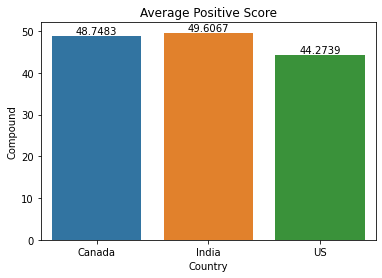

In [74]:
# use sns barplot to plot bar plot
# between Country and Sentiment value
ax = sns.barplot(x = x_pos.index, y = x_pos["Compound"],
                 data = x_pos)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title("Average Positive Score")


In [75]:
x_neg = negi.groupby("Country")[["Compound"]].mean()*100
x_neg

Compound
Country           
Canada  -37.904000
India   -46.145000
US      -43.672273

Text(0.5, 1.0, 'Average Negative Score')

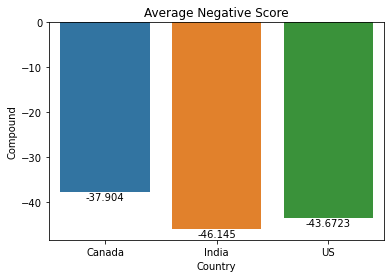

In [76]:
# use sns barplot to plot bar plot
# between Country and Sentiment value
ax = sns.barplot(x = x_neg.index, y = x_neg["Compound"],
                 data = x_neg)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title("Average Negative Score")

In [77]:
df_all = df.groupby(["Country", "Opinion"])[["Opinion_Weight"]].count()
df_all

Opinion_Weight
Country Opinion                 
Canada  Negative               5
        Neutral                9
        Positive               6
India   Negative               2
        Neutral               12
        Positive               9
US      Negative              22
        Neutral               28
        Positive              46

Text(0.5, 1.0, 'Count of Opinions in different Country')

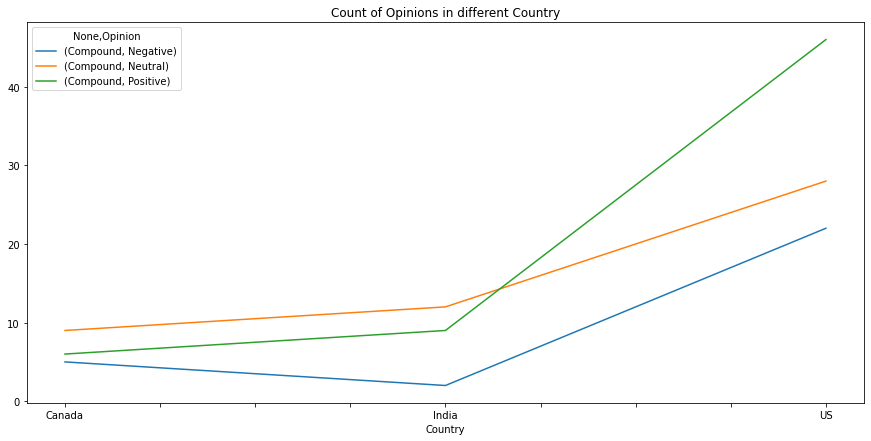

In [78]:
#ax = sns.barplot(x = df_all.index, y = df_all["Opinion_Weight"],
#                 data = df_all)
#ax.bar_label(ax.containers[0])

fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["Country", "Opinion"])[["Compound"]].count().unstack().plot(ax=ax)


ax.set_title("Count of Opinions in different Country")

# Word Cloud

A word cloud (also known as a tag cloud) is a visual representation of words. 

Cloud creators are used to highlight popular words and phrases based on frequency and relevance. 

They provide you with quick and simple visual insights that can lead to more in-depth analyses.

In [79]:
from wordcloud import WordCloud 

# Positive Word Cloud

In [80]:
#df['Lemma'] [df['Country']=='India']

# Positive WordCloud Country: India

In [81]:
all_words_positive = ' '.join(text for text in df['Lemma'][df['Country']=='India'][df['Compound'] > 0])

In [82]:
wc_positive = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_positive)

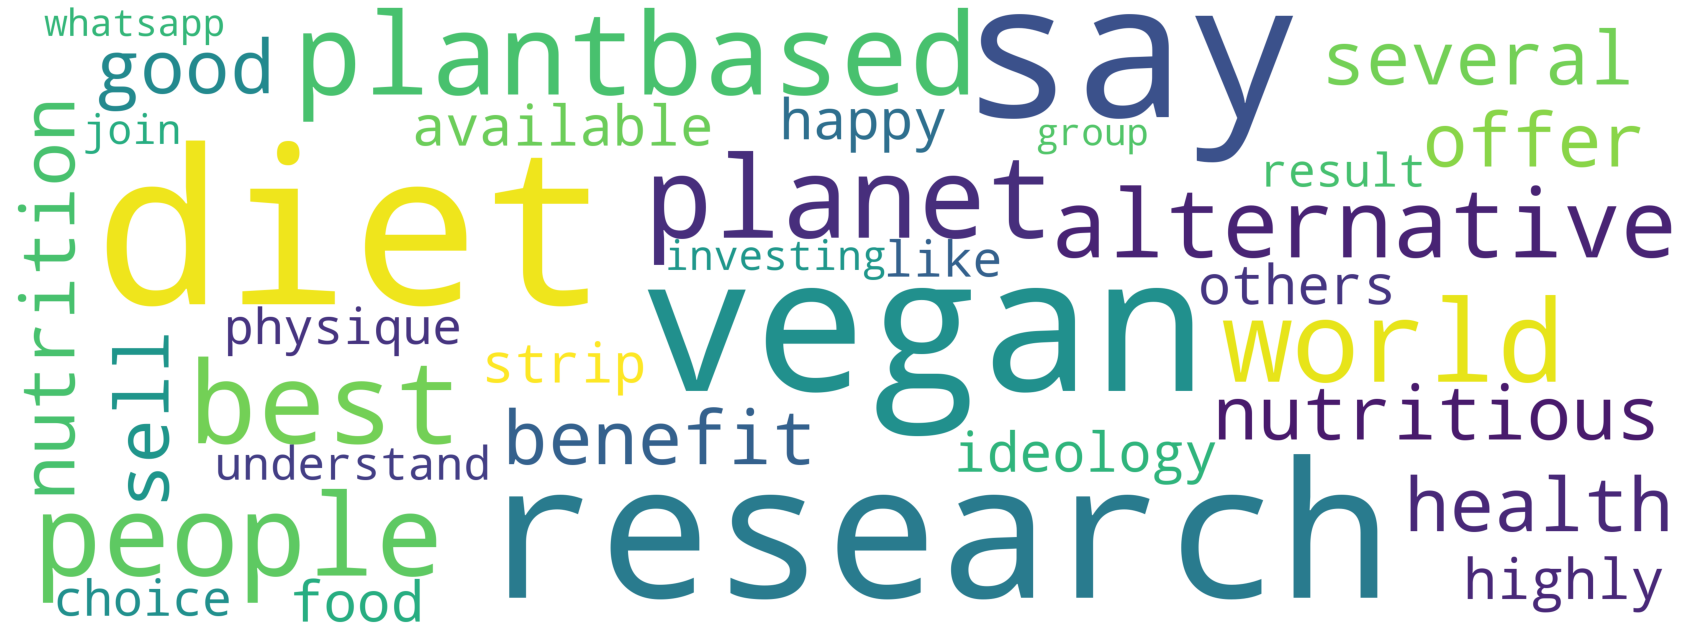

In [83]:
plt.figure(figsize=(30,30))
plt.imshow(wc_positive)
plt.axis('off')
#plt.title('Positive Wordcloud for Country India')
plt.show()

# Positive WordCloud Country: Canada

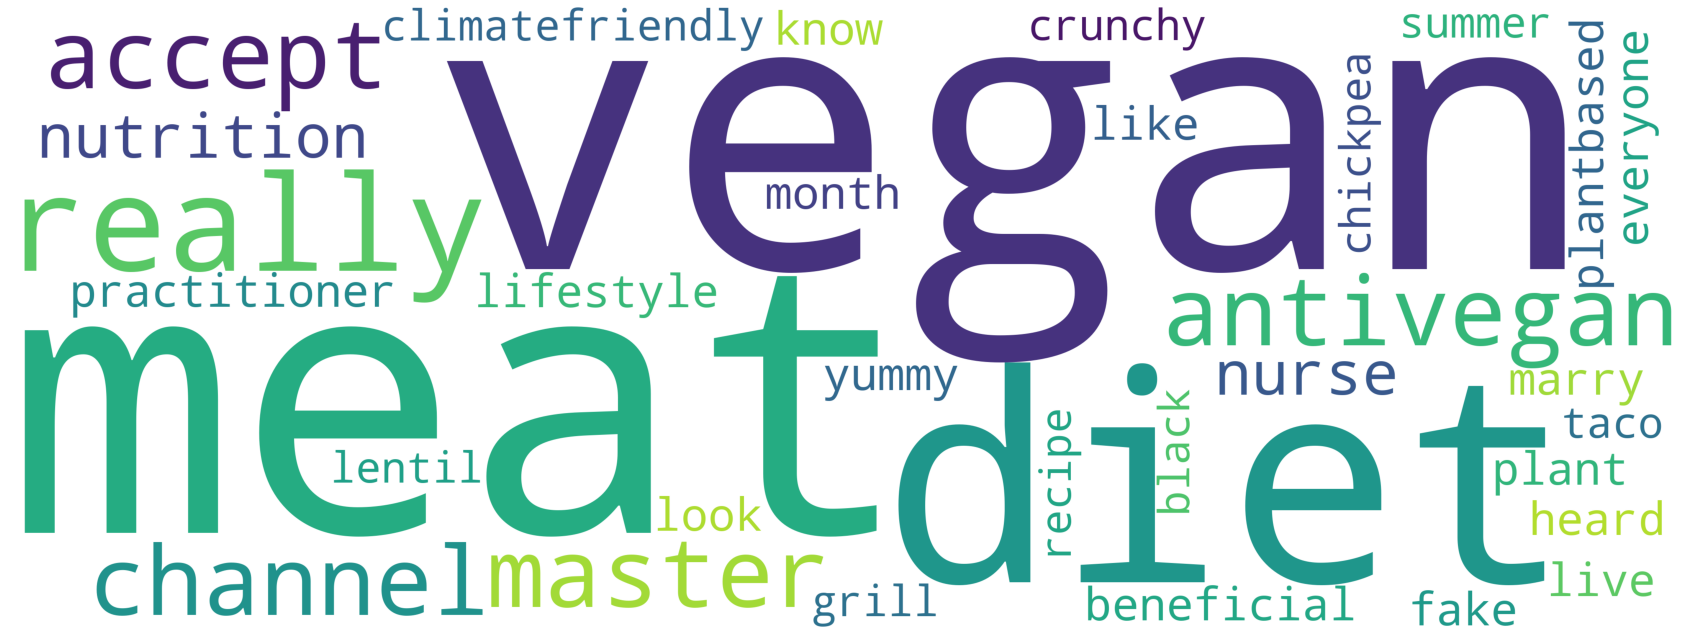

In [84]:
all_words_positive = ' '.join(text for text in df['Lemma'][df['Country']=='Canada'][df['Compound'] > 0])

wc_positive = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(30,30))
plt.imshow(wc_positive)
plt.axis('off')
#plt.title('Positive Wordcloud for Country Canada')
plt.show()

# Positive WordCloud Country: US

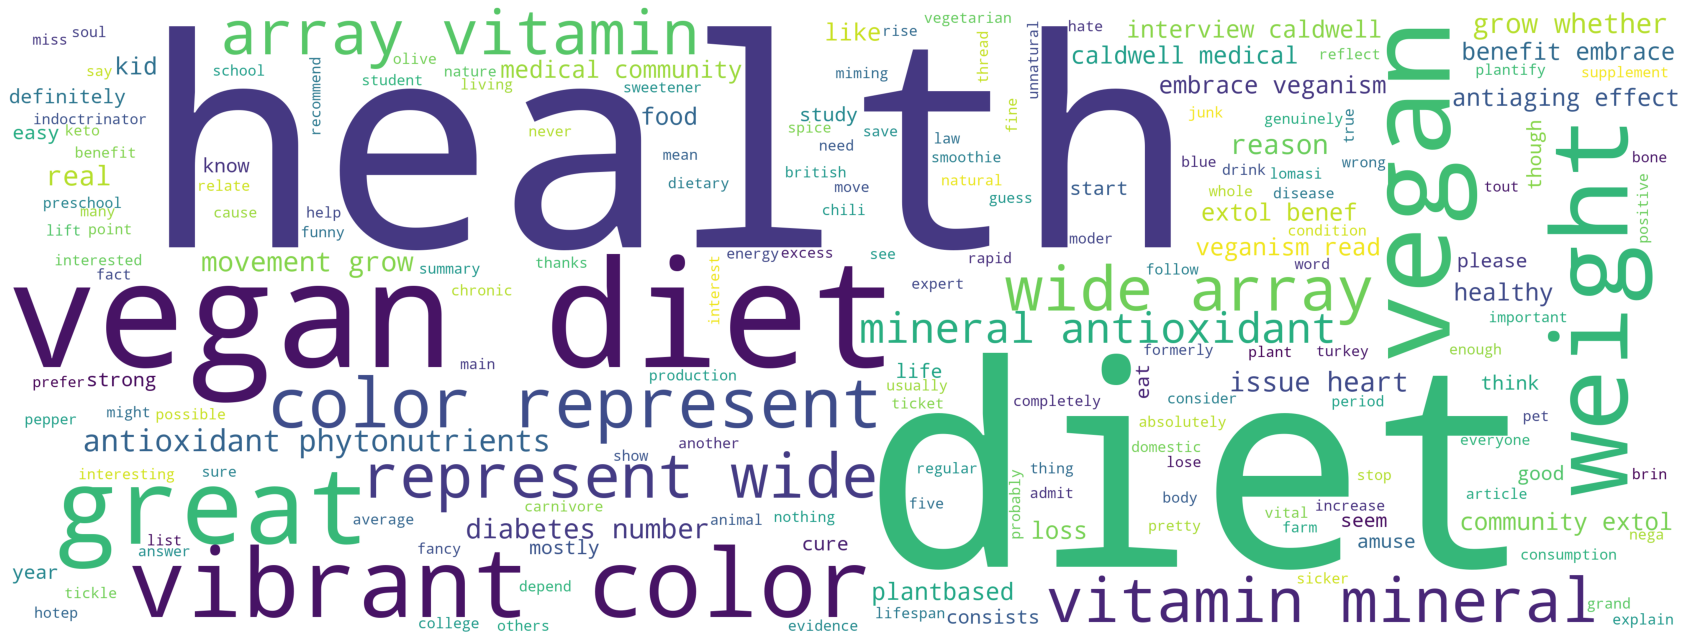

In [85]:
all_words_positive = ' '.join(text for text in df['Lemma'][df['Country']=='US'][df['Compound'] > 0])

wc_positive = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(30,30))
plt.imshow(wc_positive)
plt.axis('off')
#plt.title('Positive Wordcloud for Country US')
plt.show()

# Negative Word Cloud

# Negative WordCloud Country: India

In [86]:
all_words_negative = ' '.join(text for text in df['Lemma'][df['Country']=='India'][df['Compound'] < 0]) 

In [87]:
wc_negative = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_negative)

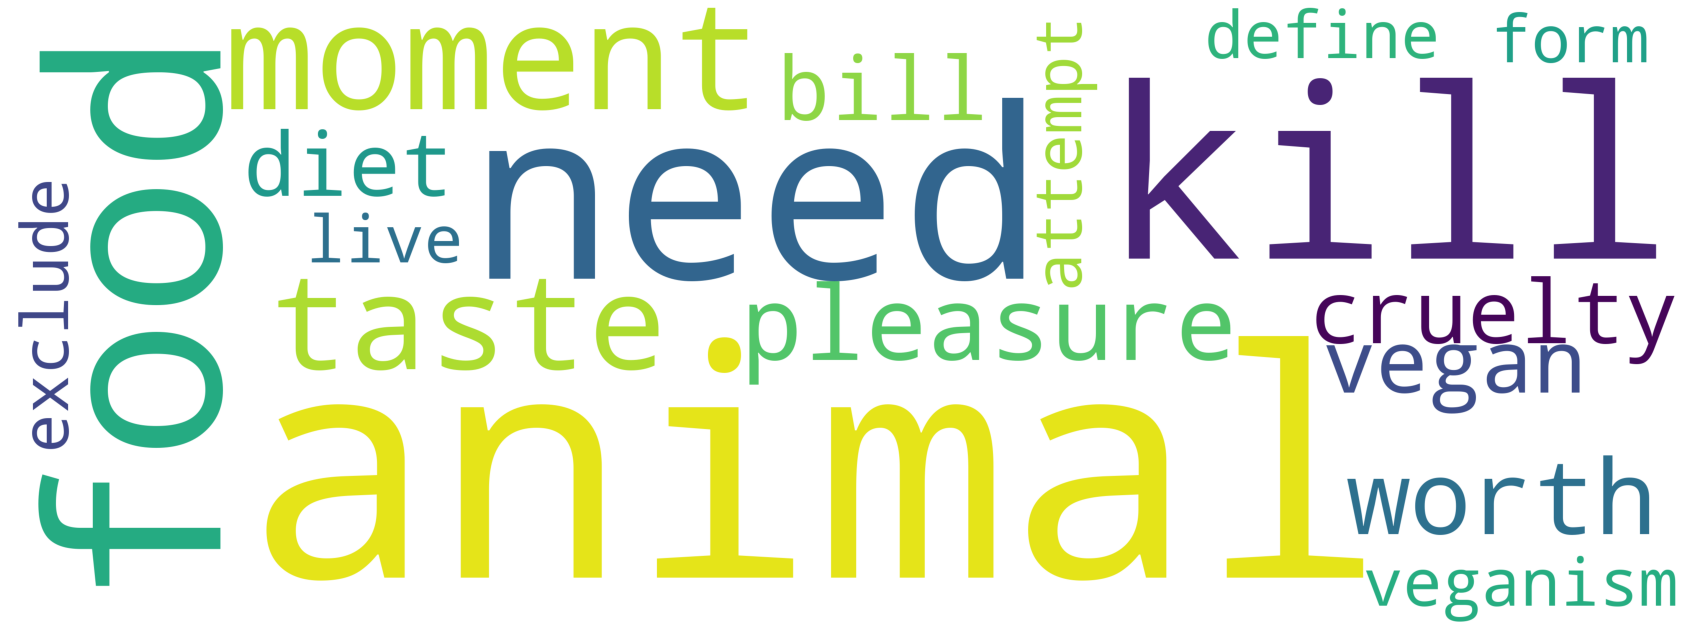

In [88]:
plt.figure(figsize=(30,30))
plt.imshow(wc_negative)
plt.axis('off')
#plt.title('Negative Wordcloud for Country India')
plt.show()

# Negative WordCloud Country: Canada

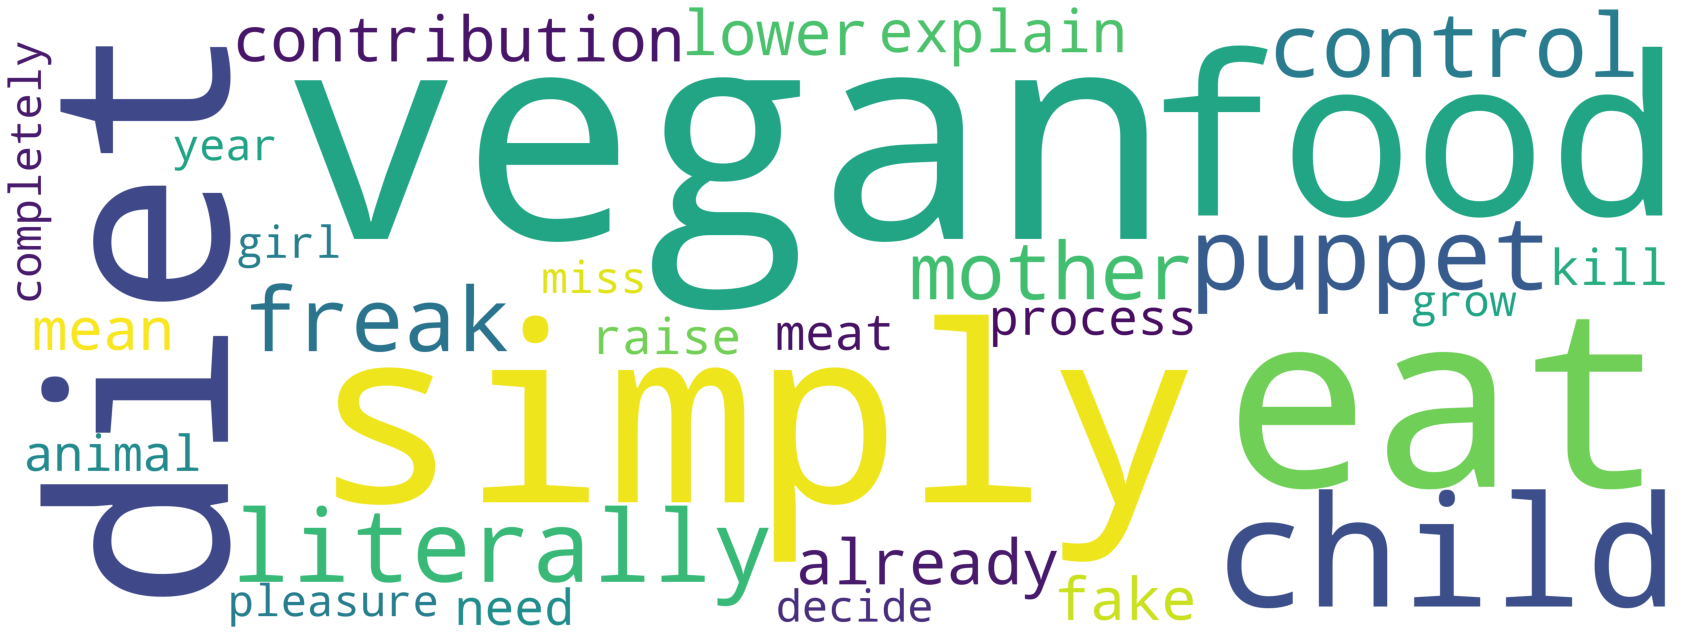

In [89]:
all_words_negative = ' '.join(text for text in df['Lemma'][df['Country']=='Canada'][df['Compound'] < 0]) 

wc_negative = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_negative)

plt.figure(figsize=(30,30))
plt.imshow(wc_negative)
plt.axis('off')
#plt.title('Negative Wordcloud for Country Canada')
plt.show()

# Negative WordCloud Country: US

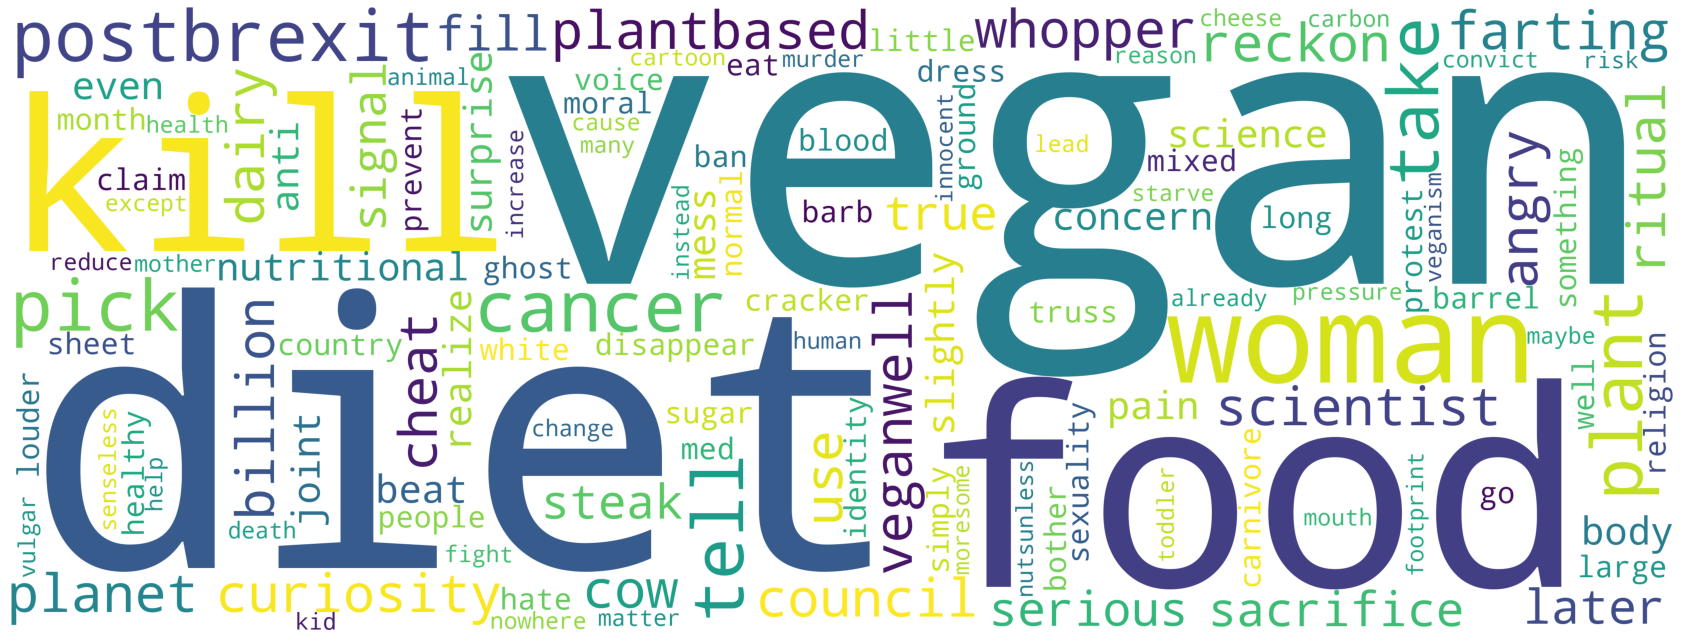

In [90]:
all_words_negative = ' '.join(text for text in df['Lemma'][df['Country']=='US'][df['Compound'] < 0]) 

wc_negative = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_negative)

plt.figure(figsize=(30,30))
plt.imshow(wc_negative)
plt.axis('off')
#plt.title('Negative Wordcloud for Country US')
plt.show()

# TF - IDF (Term Frequency - Inverse Document Frequency)

# It is a method of extracting the features from the text data.


# Used to find related content and important words and phrase in a larger text.


# 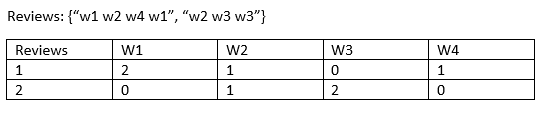

# ![TF](TF.png)

![IDF_sam](IDF_sam.png)

# Term Frequency - Words that are frequently occurring in a document(Word count)., how often does a word ‘w’ occur in a document ‘d’. 

# It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.


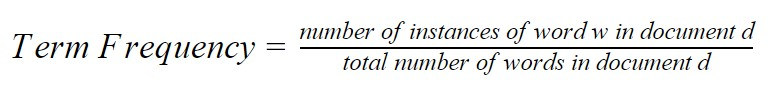

# Inverse Document Frequency

# Used to calculate the weight of rare words across all documents in the corpus.

# The words that occur rarely in the corpus have a high IDF score


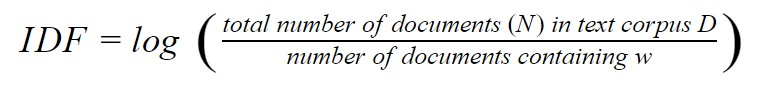

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
tw = df["Lemma"]

In [93]:
vectorizer = TfidfVectorizer()

In [94]:
Lemma = vectorizer.fit_transform(tw)

In [95]:
Lemma.shape

(139, 485)

In [96]:
df1 = pd.DataFrame(Lemma.todense(), columns=vectorizer.get_feature_names()) 
# todense() will return the matrix.

C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
df1

absolutely   accept    accord     admit    affect     alpha   already  \
0      0.000000  0.51617  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
5      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
6      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.440500   
7      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
8      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
9      0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
10     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
11     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
12     0.000000  0.00000  0.414047  0.000000  0.000000  0.000000  0.000000   
13     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
14     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
15     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
16     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
17     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
18     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
19     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
20     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
21     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
22     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
23     0.000000  0.00000  0.000000  0.000000  0.000000  0.331518  0.000000   
24     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
25     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
26     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
27     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
28     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
29     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
30     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
31     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
32     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
33     0.000000  0.00000  0.378989  0.000000  0.416019  0.000000  0.000000   
34     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
35     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
36     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
37     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
38     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
39     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
40     0.000000  0.00000  0.000000  0.378158  0.000000  0.000000  0.000000   
41     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
42     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
43     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
44     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
45     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
46     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
47     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
48     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
49     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
50     0.000000  0.00000  0

# Split the Dataset for TF-IDF DataFrame

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(Lemma, df['Opinion_Weight'], 
                                                    test_size = 0.3, random_state = 7)

In [100]:
x_train.shape

(97, 485)

In [101]:
x_test.shape

(42, 485)

In [102]:
y_train.shape

(97,)

In [103]:
y_test.shape

(42,)

# SVC(Support Vector Machine)

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [105]:
svc_model = SVC()

In [106]:
svc_model.fit(x_train, y_train)

SVC()

In [107]:
svc_pred = svc_model.predict(x_test)

In [108]:
#svc_pred

In [109]:
svc_accuracy = accuracy_score(y_test, svc_pred) *100

In [110]:
svc_accuracy

50.0

In [111]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, svc_pred))
#cm=confusion_matrix(y_test, svc_pred)

cm=confusion_matrix(y_true=y_test, y_pred=svc_pred)

Text(33.0, 0.5, 'Actual')

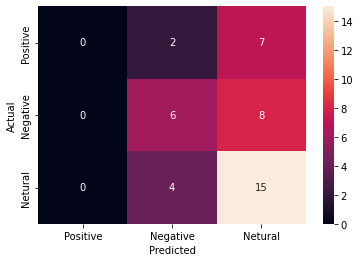

In [112]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ![Confusion](Confusion.png)

In [113]:
print("Classification Report: \n\n", classification_report(y_test, svc_pred))


Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.50      0.43      0.46        14
         1.0       0.50      0.79      0.61        19

    accuracy                           0.50        42
   macro avg       0.33      0.41      0.36        42
weighted avg       0.39      0.50      0.43        42



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# Precision: Positive Response : 67% of opinions that the model predicted.
#            Neutral Response: 100% of opinions that the model predicted.
#            Negative Response: 0% of opinions that the model predicted


# Recall: Positive Response: The model only predicted this outcome correctly for 100% of those opinions.
#         Neutral Response: The model only predicted this outcome correctly for 21% of those opinions.
#         Negative Response: The model only predicted this outcome correctly for 0% of those opinions.


# F1 Score: Positive Response: Since this value is very close to 1, it tells us that the model does a poor job of prediction.
#           Neutral Response: Since this value isn’t very close to 1, it tells us that the model does a poor job of prediction.
#           Negative Response: Since this value is 0, it tells us that the model does a poor job of prediction.

# KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [117]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [118]:
knn_pred = knn.predict(x_test)

In [119]:
#knn_pred

In [120]:
knn_accuracy = accuracy_score(y_test, knn_pred) *100

In [121]:
knn_accuracy

38.095238095238095

In [122]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
cm = confusion_matrix(y_test, knn_pred)

Text(33.0, 0.5, 'Actual')

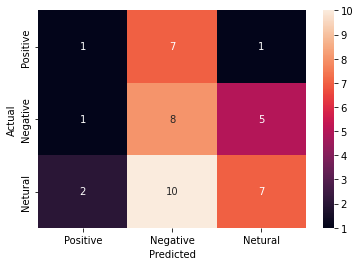

In [123]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [124]:
print("Classification Report: \n\n", classification_report(y_test, knn_pred))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.25      0.11      0.15         9
         0.0       0.32      0.57      0.41        14
         1.0       0.54      0.37      0.44        19

    accuracy                           0.38        42
   macro avg       0.37      0.35      0.33        42
weighted avg       0.40      0.38      0.37        42



# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rnd = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=50)
# n_estimators = the number of decision trees to use.

In [127]:
rnd

RandomForestClassifier(max_leaf_nodes=16, random_state=50)

In [128]:
rnd.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, random_state=50)

In [129]:
rnd_pred = rnd.predict(x_test)

In [130]:
#rnd_pred

In [131]:
rnd_accuracy = accuracy_score(y_test, rnd_pred) *100

In [132]:
rnd_accuracy

52.38095238095239

In [133]:
cm=confusion_matrix(y_true=y_test, y_pred=rnd_pred)

Text(33.0, 0.5, 'Actual')

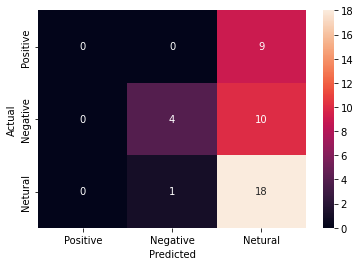

In [134]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [135]:
print("Classification Report: \n\n", classification_report(y_test, rnd_pred))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.80      0.29      0.42        14
         1.0       0.49      0.95      0.64        19

    accuracy                           0.52        42
   macro avg       0.43      0.41      0.35        42
weighted avg       0.49      0.52      0.43        42



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Classifier

In [136]:
from sklearn import model_selection, naive_bayes

In [137]:
Naive = naive_bayes.MultinomialNB()

In [138]:
Naive.fit(x_train, y_train)

MultinomialNB()

In [139]:
nb_pred = Naive.predict(x_test)

In [140]:
nb_accuracy = accuracy_score(nb_pred, y_test)*100

In [141]:
nb_accuracy

45.23809523809524

In [142]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
cm = confusion_matrix(y_true=y_test, y_pred=nb_pred)

Text(33.0, 0.5, 'Actual')

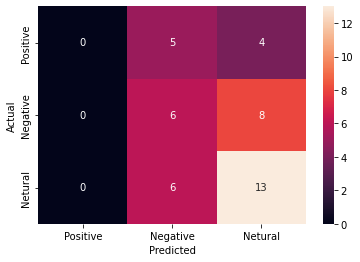

In [143]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [144]:
print("Classification Report: \n\n", classification_report(y_test, rnd_pred))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.80      0.29      0.42        14
         1.0       0.49      0.95      0.64        19

    accuracy                           0.52        42
   macro avg       0.43      0.41      0.35        42
weighted avg       0.49      0.52      0.43        42



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparison of different models for TF-IDF

In [145]:
all_algo = ['SVC', 'KNN','Random Forest', 'Naive Bayes']

In [146]:
all_accuracy = [svc_accuracy, knn_accuracy, rnd_accuracy, nb_accuracy]

In [147]:
all_compare = pd.DataFrame({'Models' : all_algo, 'Accuracy' : all_accuracy}, index = [i for i in range(1, 5)])

In [148]:
all_compare.T

1          2              3            4
Models     SVC        KNN  Random Forest  Naive Bayes
Accuracy  50.0  38.095238      52.380952    45.238095

In [149]:
all_compare.style.bar(subset=['Accuracy'], color='#bfe8ae')

In [150]:
import seaborn as sns

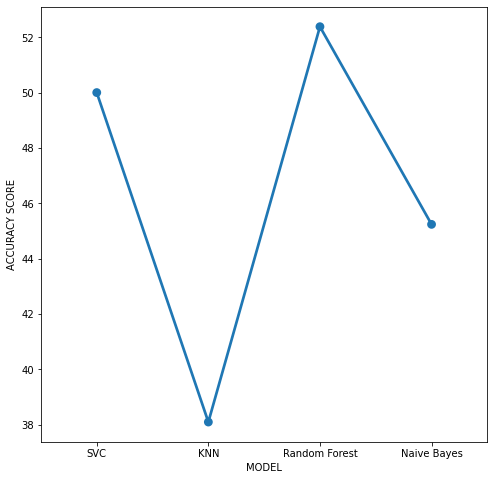

In [151]:
plt.figure(figsize = (8, 8))
sns.pointplot(x = all_compare["Models"], y = all_compare["Accuracy"], data = all_compare)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY SCORE')
plt.show()

# Count Vectorizer

In [152]:
countVectorizer = CountVectorizer()

countVectorizer.fit(tw)

cvec_counts = countVectorizer.transform(tw)


In [153]:
df2 = pd.DataFrame(cvec_counts.todense(), columns=vectorizer.get_feature_names())
# todense() will return the matrix.
print(df2)

C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     absolutely  accept  accord  admit  affect  alpha  already  alternative  \
0             0       1       0      0       0      0        0            0   
1             0       0       0      0       0      0        0            0   
2             0       0       0      0       0      0        0            0   
3             0       0       0      0       0      0        0            0   
4             0       0       0      0       0      0        0            0   
5             0       0       0      0       0      0        0            0   
6             0       0       0      0       0      0        1            0   
7             0       0       0      0       0      0        0            0   
8             0       0       0      0       0      0        0            0   
9             0       0       0      0       0      0        0            0   
10            0       0       0      0       0      0        0            0   
11            0       0       0      0       0      

# Split the Dataset for Count Vectorizer DataFrame

In [154]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(cvec_counts, df['Opinion_Weight'], 
                                                    test_size = 0.3, random_state = 7)

In [155]:
x_train_c.shape

(97, 485)

In [156]:
y_train_c.shape

(97,)

In [157]:
x_test_c.shape

(42, 485)

In [158]:
y_test_c.shape

(42,)

# KNN

In [159]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(x_train_c, y_train_c)

knn_pred_c = knn.predict(x_test_c)

#knn_pred

knn_accuracy_c = accuracy_score(y_test_c, knn_pred_c) *100

knn_accuracy_c

28.57142857142857

Text(33.0, 0.5, 'Actual')

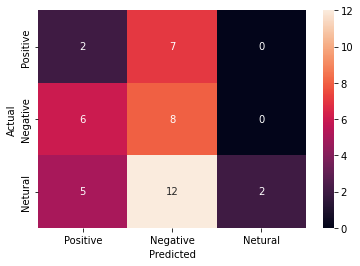

In [160]:
cm=confusion_matrix(y_true=y_test, y_pred=knn_pred_c)

sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [161]:
print("Classification Report: \n\n", classification_report(y_test, knn_pred_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.15      0.22      0.18         9
         0.0       0.30      0.57      0.39        14
         1.0       1.00      0.11      0.19        19

    accuracy                           0.29        42
   macro avg       0.48      0.30      0.25        42
weighted avg       0.58      0.29      0.26        42



# SVM

In [162]:
svc_model = SVC()

svc_model.fit(x_train_c, y_train_c)

svc_pred_c = svc_model.predict(x_test_c)

#svc_pred

svc_accuracy_c = accuracy_score(y_test_c, svc_pred_c) *100

svc_accuracy_c

50.0

Text(33.0, 0.5, 'Actual')

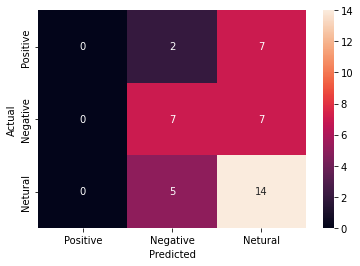

In [163]:
cm=confusion_matrix(y_true=y_test, y_pred=svc_pred_c)


sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [164]:
print("Classification Report: \n\n", classification_report(y_test, svc_pred_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.50      0.50      0.50        14
         1.0       0.50      0.74      0.60        19

    accuracy                           0.50        42
   macro avg       0.33      0.41      0.37        42
weighted avg       0.39      0.50      0.44        42



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [165]:
rnd = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=50)
# n_estimatores = the number of decision trees to use.

rnd

rnd.fit(x_train_c, y_train_c)

rnd_pred_c = rnd.predict(x_test_c)

#rnd_pred

rnd_accuracy_c = accuracy_score(y_test_c, rnd_pred_c) *100

rnd_accuracy_c

50.0

Text(33.0, 0.5, 'Actual')

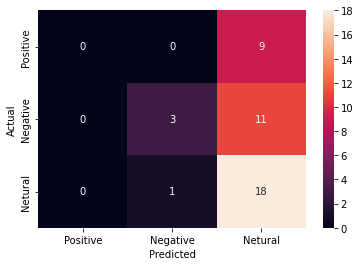

In [166]:
cm=confusion_matrix(y_true=y_test, y_pred=rnd_pred_c)


sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [167]:
print("Classification Report: \n\n", classification_report(y_test, rnd_pred_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.75      0.21      0.33        14
         1.0       0.47      0.95      0.63        19

    accuracy                           0.50        42
   macro avg       0.41      0.39      0.32        42
weighted avg       0.46      0.50      0.40        42



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [168]:
Naive = naive_bayes.MultinomialNB()

Naive.fit(x_train_c, y_train_c)

nb_pred_c = Naive.predict(x_test_c)

nb_accuracy_c = accuracy_score(nb_pred_c, y_test_c)*100

nb_accuracy_c

40.476190476190474

Text(33.0, 0.5, 'Actual')

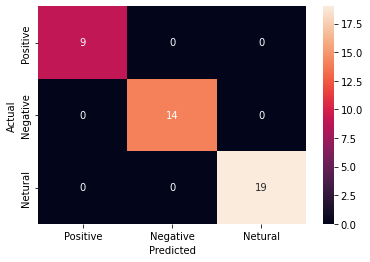

In [169]:
cm=confusion_matrix(y_true=y_test, y_pred=y_test_c)

sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [170]:
print("Classification Report: \n\n", classification_report(y_test, y_test_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         9
         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# Comparison of different models for CountVectorizer

In [171]:
all_algo_c = ['SVC', 'KNN','Random Forest', 'Naive Bayes']

all_accuracy_c = [svc_accuracy_c, knn_accuracy_c, rnd_accuracy_c, nb_accuracy_c]

all_compare_c = pd.DataFrame({'Models' : all_algo_c, 'Accuracy' : all_accuracy_c}, index = [i for i in range(1, 5)])

all_compare_c.T

all_compare_c.style.bar(subset=['Accuracy'], color='#bfe8ae')

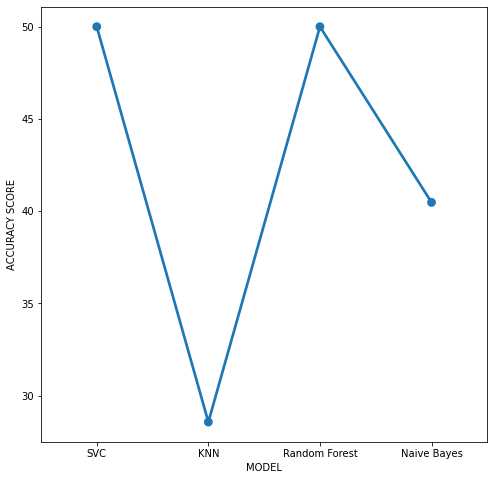

In [172]:
plt.figure(figsize = (8, 8))
sns.pointplot(x = all_compare_c["Models"], y = all_compare_c["Accuracy"], data = all_compare)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY SCORE')
plt.show()

# Comaprison of TF-IDF and CountVector

In [173]:
all_algo = ['SVC', 'KNN','Random Forest', 'Naive Bayes']

all_accuracy = [svc_accuracy, knn_accuracy, rnd_accuracy, nb_accuracy]
all_accuracy_c = [svc_accuracy_c, knn_accuracy_c, rnd_accuracy_c, nb_accuracy_c]

In [174]:
all_compare = pd.DataFrame({'Models' : all_algo, 'TF-IDF Accuracy' : all_accuracy, 
                            'Count Vectorizer Accuracy' : all_accuracy_c},
                           index = [i for i in range(1, 5)])

all_compare

Models  TF-IDF Accuracy  Count Vectorizer Accuracy
1            SVC        50.000000                  50.000000
2            KNN        38.095238                  28.571429
3  Random Forest        52.380952                  50.000000
4    Naive Bayes        45.238095                  40.476190

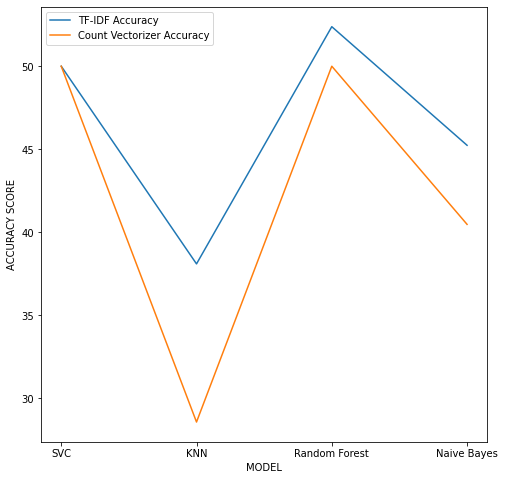

In [175]:
plt.figure(figsize = (8, 8))
plt.plot(all_compare["Models"], all_compare["TF-IDF Accuracy"],label='TF-IDF Accuracy')
plt.plot(all_compare["Models"], all_compare["Count Vectorizer Accuracy"],label='Count Vectorizer Accuracy')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY SCORE')
plt.legend()
plt.show()